In [1]:
# opencv 人脸区域辨识
# SVC 算法，可以识别人脸，叫什么，是谁，训练
# 打卡机，人脸对比

In [ ]:
# github: 參考 face_morpher

In [3]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets
#分類
from sklearn.svm import SVC 

In [7]:
faces  = datasets.fetch_lfw_people(min_faces_per_person=70,resize=1) # min_faces_per_person 最少幾張才選 slice 

In [8]:
faces

{'data': array([[253.66667 , 253.66667 , 254.66667 , ...,  86.666664,  86.333336,
          86.333336],
        [ 42.      ,  34.      ,  31.666666, ..., 121.666664, 148.      ,
         185.33333 ],
        [ 94.      ,  72.      ,  74.      , ..., 182.66667 , 183.      ,
         182.33333 ],
        ...,
        [ 84.333336,  86.      ,  85.333336, ...,  44.      ,  35.666668,
          30.333334],
        [ 49.666668,  50.333332,  47.666668, ..., 178.66667 , 167.66667 ,
         127.333336],
        [ 31.333334,  33.333332,  26.666666, ...,  47.666668,  63.      ,
          99.      ]], dtype=float32),
 'images': array([[[253.66667 , 253.66667 , 254.66667 , ...,  42.333332,
           37.666668,  39.      ],
         [254.      , 254.      , 253.66667 , ...,  43.333332,
           38.      ,  39.      ],
         [254.66667 , 254.33333 , 253.33333 , ...,  44.      ,
           38.666668,  38.      ],
         ...,
         [ 68.333336,  63.333332,  51.      , ...,  90.333336,
     

In [9]:
X = faces['data']

y = faces['target']

names = faces.target_names

In [11]:
image = faces['images']

image.shape

(1288, 125, 94)

'Tony Blair'

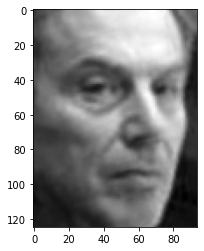

In [15]:
index = np.random.randint(1288,size =1)[0]

plt.imshow(image[index],cmap =plt.cm.gray)

names[y[index]]

In [19]:
X.shape   #11750  過多 屬於高維

(1288, 11750)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
%%time
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

svc = SVC(kernel='rbf')

svc.fit(X_train,y_train)

print(svc.score(X_test,y_test))

0.7713178294573644
Wall time: 2min 22s


In [32]:
X_pca.std(axis = 0)

array([0.999612  , 0.999612  , 0.9996118 , 0.9996118 , 0.9996114 ,
       0.99961233, 0.9996121 , 0.9996114 , 0.99961156, 0.9996118 ,
       0.9996121 , 0.99961174, 0.99961203, 0.99961203, 0.9996119 ,
       0.9996119 , 0.9996123 , 0.99961215, 0.99961185, 0.9996119 ,
       0.99961156, 0.9996117 , 0.99961203, 0.999612  , 0.99961203,
       0.9996118 , 0.99961185, 0.9996121 , 0.9996119 , 0.9996118 ,
       0.9996119 , 0.9996118 , 0.9996118 , 0.999612  , 0.9996115 ,
       0.9996119 , 0.9996117 , 0.9996119 , 0.9996117 , 0.9996118 ,
       0.99961185, 0.9996118 , 0.9996116 , 0.9996118 ], dtype=float32)

In [20]:
from sklearn.decomposition import PCA #降解

In [29]:
# 主成分分析
# Principal component analysis (PCA)
# n_components 保留多少主成分
# whiten = True 白化，歸化|
pca = PCA(n_components=0.8,whiten = True)

# 代表原来的数据，经过矩阵运算，结果属性看不懂（属性，没有实际的物理意义），脱敏(敏感)数据
X_pca = pca.fit_transform(X)

X_pca.shape   #從一萬多個屬性降到幾百個

(1288, 44)

In [30]:
X_pca

array([[ 0.1312694 ,  0.14904457,  0.517895  , ..., -0.6832659 ,
        -0.6144092 ,  0.14082117],
       [ 0.9204029 , -0.8000442 ,  0.6680563 , ..., -1.2836641 ,
        -0.35627756, -0.35998222],
       [-0.6990382 , -0.3068947 , -0.8637635 , ...,  0.02142393,
         0.9234543 , -0.73075384],
       ...,
       [ 1.7497405 ,  0.39074796, -0.2540261 , ..., -0.09439319,
        -1.7521577 ,  2.1142242 ],
       [-1.7680984 , -0.6549469 ,  0.7710087 , ...,  0.98080856,
        -0.02718356, -0.26369157],
       [ 0.5447322 , -0.15662566,  0.66641027, ..., -0.57911485,
         0.7364199 , -1.1941954 ]], dtype=float32)

In [31]:
%%time
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size = 0.2)

svc = SVC()

svc.fit(X_train,y_train)

print(svc.score(X_test,y_test))

0.8565891472868217
Wall time: 109 ms


In [34]:
for i in range(7):
    print (names[i],(y ==i).sum())  #樣本量不均衡

Ariel Sharon 77
Colin Powell 236
Donald Rumsfeld 121
George W Bush 530
Gerhard Schroeder 109
Hugo Chavez 71
Tony Blair 144


In [36]:
import imblearn #數據平衡

In [38]:
from imblearn.over_sampling import SMOTE  #讓數據平衡

In [39]:
'''This object is an implementation of SMOTE - Synthetic Minority
Over-sampling Technique as presented in'''
smote = SMOTE()

In [40]:
X2,y2 = smote.fit_resample(X,y)

In [41]:
for i in range(7):   #樣本均衡
    print(names[i],(y2 == i).sum())

Ariel Sharon 530
Colin Powell 530
Donald Rumsfeld 530
George W Bush 530
Gerhard Schroeder 530
Hugo Chavez 530
Tony Blair 530


In [42]:
pca = PCA(n_components=0.9,whiten=True)

X2_pca = pca.fit_transform(X2)
X2_pca.shape

(3710, 99)

In [43]:
%%time
X_train,X_test,y_train,y_test = train_test_split(X2_pca,y2,test_size = 0.2)

svc = SVC()

svc.fit(X_train,y_train)

print(svc.score(X_test,y_test))

0.9865229110512129
Wall time: 592 ms


In [44]:
%%time
face_train,face_test,X_train,X_test,y_train,y_test = train_test_split(X2,X2_pca,y2,test_size = 0.2) # 樣本數據加樣本平均數據

svc = SVC()

svc.fit(X_train,y_train)

print(svc.score(X_test,y_test))

y_ = svc.predict(X_test)

0.9824797843665768
Wall time: 763 ms


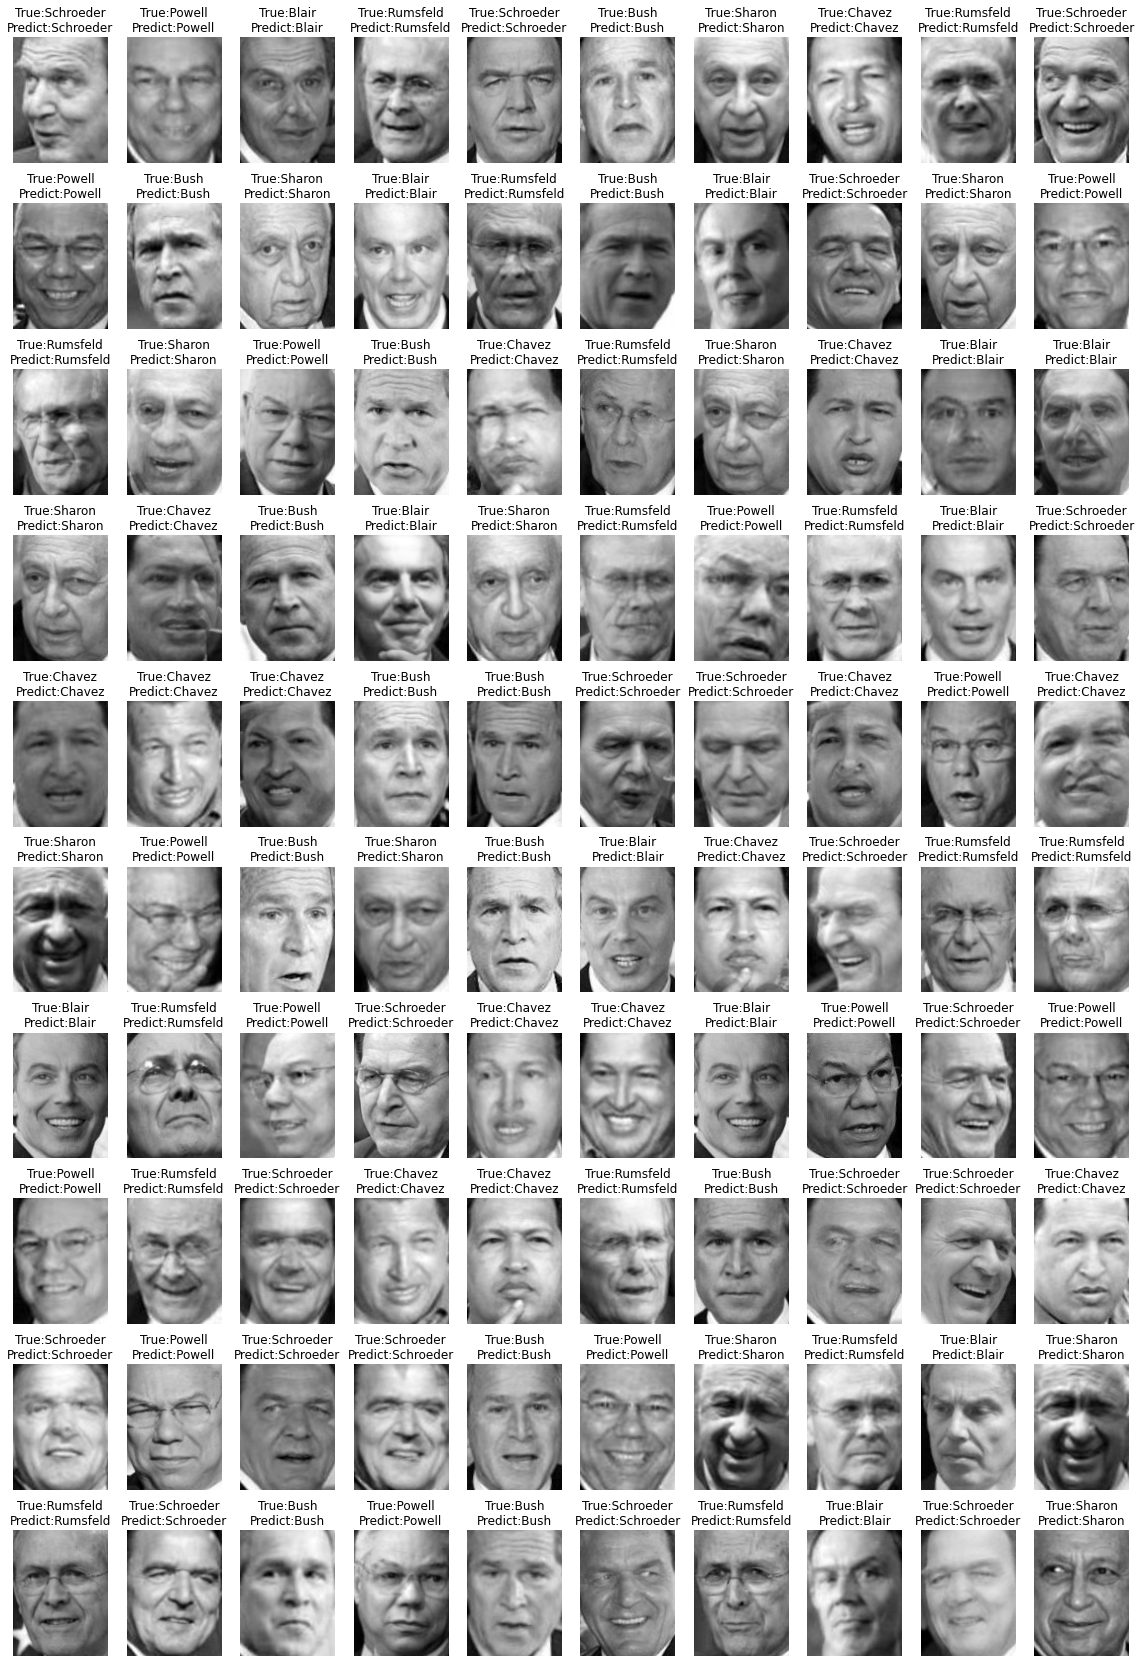

In [47]:
plt.figure(figsize=(10*2,10*3))
for i in range(100):
    
    ax = plt.subplot(10,10,i + 1)
    
    face = face_test[i].reshape(125,94)
    
    ax.imshow(face,cmap = 'gray')
    ax.axis('off')
    t = names[y_test[i]].split(' ')[-1]
    
    p = names[y_[i]].split(' ')[-1]
    
    ax.set_title('True:%s\nPredict:%s'%(t,p)) #True 真實的   Predict 預測的